## Explorando dados históricos das olimpíadas (1964-2016)

* https://basedosdados.org/dataset/mundo-kaggle-olimpiadas

### Importando pacotes requeridos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import basedosdados as bd

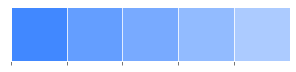

In [136]:
theme = ["#4188ff", "#649eff","#78aaff","#92bbff","#accbff"]
sns.palplot(sns.color_palette(theme))
palette= sns.set_palette(sns.color_palette(theme))

In [2]:
bd.list_datasets(filter_by='olimpiadas', with_description=True)


dataset_id: 
	mundo_kaggle_olimpiadas 
description: 
	A base oferece a série histórica de dados dos atletas presentes em Jogos Olímpicos 
1896. Mais informações podem ser acessadas em https://www.kaggle.com/heesoo37/olympic-history-data-a-thorough-analysis 
-----------------------------------------------------------------------------------------------



In [4]:
query = """ SELECT * 
            FROM `basedosdados.mundo_kaggle_olimpiadas.microdados` 
            WHERE esporte = 'Volleyball'
        """

In [5]:
df = bd.read_sql(query, billing_project_id='olimpiadas-341720')

Downloading: 100%|██████████| 3404/3404 [00:01<00:00, 2805.92rows/s]


### Explorando os dados da base de dados

In [6]:
df.head()

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
0,1964,Summer,Tokyo,Brazil,BRA,Brazil,13470,Victor Mrio Barcellos Borges,M,22.0,177.0,73.0,Volleyball,Volleyball Men's Volleyball,None
1,1964,Summer,Tokyo,Brazil,BRA,Brazil,24641,Jos Maria Schwartz da Costa,M,23.0,185.0,76.0,Volleyball,Volleyball Men's Volleyball,None
2,1964,Summer,Tokyo,Brazil,BRA,Brazil,25896,Dcio Viotti de Azevedo,M,24.0,184.0,74.0,Volleyball,Volleyball Men's Volleyball,None
3,1964,Summer,Tokyo,Brazil,BRA,Brazil,26507,Hamilton Leo de Oliveira,M,30.0,182.0,70.0,Volleyball,Volleyball Men's Volleyball,None
4,1964,Summer,Tokyo,Brazil,BRA,Brazil,34485,Carlos Eduardo Albano Feitosa,M,23.0,180.0,75.0,Volleyball,Volleyball Men's Volleyball,None


In [12]:
df.dtypes

ano              int64
edicao          object
cidade_sede     object
pais            object
delegacao       object
equipe          object
id_atleta       object
nome_atleta     object
sexo            object
idade          float64
altura         float64
peso           float64
esporte         object
evento          object
medalha         object
dtype: object

In [5]:
# qual a idade da atleta mais velha em cada edição da olimpiada.
df.loc[df.sexo == 'F'].groupby(['ano','cidade_sede']).idade.agg([min,max])

,,min,max
ano,cidade_sede,,
1964,Tokyo,16.0,32.0
1968,Mexico City,17.0,36.0
1972,Munich,17.0,34.0
1976,Montreal,15.0,34.0
1980,Moskva,15.0,32.0
1984,Los Angeles,16.0,30.0
1988,Seoul,17.0,34.0
1992,Barcelona,17.0,30.0
1996,Atlanta,17.0,34.0


In [13]:
# qual a idade do atleta mais velha em cada edição da olimpiada.
df.loc[df.sexo == 'M'].groupby(['ano','cidade_sede']).idade.agg([min,max])

,,min,max
ano,cidade_sede,,
1964,Tokyo,18.0,37.0
1968,Mexico City,17.0,37.0
1972,Munich,17.0,35.0
1976,Montreal,19.0,32.0
1980,Moskva,18.0,32.0
1984,Los Angeles,19.0,32.0
1988,Seoul,18.0,35.0
1992,Barcelona,18.0,33.0
1996,Atlanta,18.0,36.0


In [20]:
# quem era a atleta mais velha em 2016
df.loc[(df.sexo == 'F' )& (df.ano == 2016) & (df.idade == 38)]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
3354,2016,Summer,Rio de Janeiro,Russia,RUS,Russia,132947,Yelena Igorevna Yezhova (Kuzmina-),F,38.0,178.0,69.0,Volleyball,Volleyball Women's Volleyball,None


In [18]:
df.loc[(df.sexo == 'M' )& (df.ano == 2016) & (df.idade == 41)]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
3219,2016,Summer,Rio de Janeiro,Egypt,EGY,Egypt,471,Ashraf Abou El-Hassan,M,41.0,186.0,86.0,Volleyball,Volleyball Men's Volleyball,None


In [27]:
# quais atletas tinham 18 anos ou menos nas olimpiadas de edição Rio 2016
df.loc[(df.sexo == 'F' ) & (df.ano == 2016) & (df.idade <= 18)]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
3257,2016,Summer,Rio de Janeiro,Italy,ITA,Italy,31611,Paola Ogechi Egonu,F,17.0,190.0,70.0,Volleyball,Volleyball Women's Volleyball,None
3264,2016,Summer,Rio de Janeiro,Italy,ITA,Italy,89527,Alessia Orro,F,18.0,180.0,74.0,Volleyball,Volleyball Women's Volleyball,None


In [30]:
df.loc[(df.sexo == 'M' ) & (df.ano == 2016) & (df.idade <= 18)]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
3203,2016,Summer,Rio de Janeiro,Cuba,CUB,Cuba,22627,Javier Octavio Concepcin Rojas,M,18.0,200.0,84.0,Volleyball,Volleyball Men's Volleyball,None
3206,2016,Summer,Rio de Janeiro,Cuba,CUB,Cuba,41073,Adrin Eduardo Goide Arredondo,M,18.0,191.0,80.0,Volleyball,Volleyball Men's Volleyball,None
3210,2016,Summer,Rio de Janeiro,Cuba,CUB,Cuba,78423,Osniel Lzaro Melgarejo Hernndez,M,18.0,195.0,83.0,Volleyball,Volleyball Men's Volleyball,None


### Analisando dados do voleibol mundial nas olimpíadas (1964 - 2016)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='peso', ylabel='altura'>

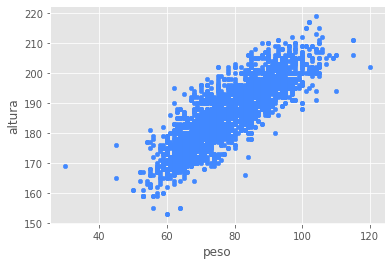

In [128]:
# Relação Peso X Altura de todos os atletas
df.plot(kind='scatter', x = 'peso',y = 'altura')

*- podemos observar que altura e peso se correlacionam, pois quanto maior a altura maior o peso*

In [54]:
# qual a altura da atleta de maior e menor estatura em cada edição
df[df.sexo == 'F'].groupby(['ano','cidade_sede']).altura.agg([min,max])

,,min,max
ano,cidade_sede,,
1964,Tokyo,1.55,1.88
1968,Mexico City,1.60,1.86
1972,Munich,1.62,1.85
1976,Montreal,1.60,1.89
1980,Moskva,1.69,1.96
1984,Los Angeles,1.62,1.95
1988,Seoul,1.62,1.94
1992,Barcelona,1.62,1.91
1996,Atlanta,1.63,1.96


In [53]:
# qual a altura do atleta de maior e menor estatura em cada edição
df[df.sexo == 'M'].groupby(['ano','cidade_sede']).altura.agg([min,max])

,,min,max
ano,cidade_sede,,
1964,Tokyo,1.70,1.98
1968,Mexico City,1.72,2.01
1972,Munich,1.71,2.01
1976,Montreal,1.75,2.00
1980,Moskva,1.77,2.07
1984,Los Angeles,1.74,2.03
1988,Seoul,1.75,2.10
1992,Barcelona,1.75,2.09
1996,Atlanta,1.80,2.17


In [52]:
# atletas com estatura maior que 2 metros
df[df.sexo == 'F'][df.altura > 2.00]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
2176,2000,Summer,Sydney,Russia,RUS,Russia,38255,Yekaterina Aleksandrovna Gamova,F,19.0,2.02,80.0,Volleyball,Volleyball Women's Volleyball,Silver
2187,2000,Summer,Sydney,Russia,RUS,Russia,96444,Olga Dmitriyevna Potashova,F,24.0,2.04,98.0,Volleyball,Volleyball Women's Volleyball,Silver
2477,2004,Summer,Athina,Russia,RUS,Russia,38255,Yekaterina Aleksandrovna Gamova,F,23.0,2.02,80.0,Volleyball,Volleyball Women's Volleyball,Silver
2747,2008,Summer,Beijing,Russia,RUS,Russia,38255,Yekaterina Aleksandrovna Gamova,F,27.0,2.02,80.0,Volleyball,Volleyball Women's Volleyball,None
2755,2008,Summer,Beijing,Russia,RUS,Russia,78915,Yuliya Viktorovna Merkulova,F,24.0,2.02,75.0,Volleyball,Volleyball Women's Volleyball,None
2994,2012,Summer,London,Russia,RUS,Russia,38255,Yekaterina Aleksandrovna Gamova,F,31.0,2.02,80.0,Volleyball,Volleyball Women's Volleyball,None
3003,2012,Summer,London,Russia,RUS,Russia,78915,Yuliya Viktorovna Merkulova,F,28.0,2.02,75.0,Volleyball,Volleyball Women's Volleyball,None
3200,2016,Summer,Rio de Janeiro,China,CHN,China,133402,Yuan Xinyue,F,19.0,2.01,78.0,Volleyball,Volleyball Women's Volleyball,Gold
3342,2016,Summer,Rio de Janeiro,Russia,RUS,Russia,74221,Darya Nikolayevna Malygina,F,22.0,2.02,82.0,Volleyball,Volleyball Women's Volleyball,None


In [44]:
df[df.sexo == 'M'][df.altura > 2.10]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
0,1964,Summer,Tokyo,Brazil,BRA,Brazil,13470,Victor Mrio Barcellos Borges,M,22.0,177.0,73.0,Volleyball,Volleyball Men's Volleyball,None
1,1964,Summer,Tokyo,Brazil,BRA,Brazil,24641,Jos Maria Schwartz da Costa,M,23.0,185.0,76.0,Volleyball,Volleyball Men's Volleyball,None
2,1964,Summer,Tokyo,Brazil,BRA,Brazil,25896,Dcio Viotti de Azevedo,M,24.0,184.0,74.0,Volleyball,Volleyball Men's Volleyball,None
3,1964,Summer,Tokyo,Brazil,BRA,Brazil,26507,Hamilton Leo de Oliveira,M,30.0,182.0,70.0,Volleyball,Volleyball Men's Volleyball,None
4,1964,Summer,Tokyo,Brazil,BRA,Brazil,34485,Carlos Eduardo Albano Feitosa,M,23.0,180.0,75.0,Volleyball,Volleyball Men's Volleyball,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,2016,Summer,Rio de Janeiro,USA,USA,United States,105311,Taylor Sander,M,24.0,193.0,86.0,Volleyball,Volleyball Men's Volleyball,Bronze
3399,2016,Summer,Rio de Janeiro,USA,USA,United States,109967,Erik Thomas Shoji,M,26.0,183.0,73.0,Volleyball,Volleyball Men's Volleyball,Bronze
3400,2016,Summer,Rio de Janeiro,USA,USA,United States,109968,Kawika Shoji,M,28.0,191.0,88.0,Volleyball,Volleyball Men's Volleyball,Bronze
3401,2016,Summer,Rio de Janeiro,USA,USA,United States,112232,David Michael Smith,M,31.0,201.0,86.0,Volleyball,Volleyball Men's Volleyball,Bronze


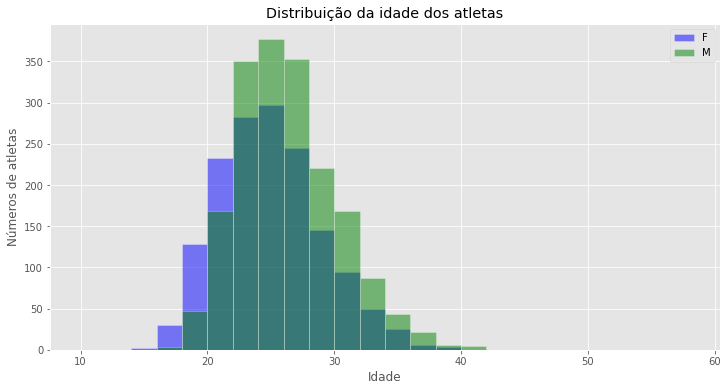

In [129]:
plt.figure(figsize=(12,6))
plt.title("Distribuição da idade dos atletas")
plt.xlabel("Idade")
plt.ylabel("Números de atletas")
plt.hist(df[df.sexo == 'F'].idade, bins = np.arange(10,60,2), color='blue',  label='F', edgecolor='white', alpha = 0.5)
plt.hist(df[df.sexo == 'M'].idade, bins = np.arange(10,60,2), color='green',  label='M', edgecolor='white', alpha = 0.5)
plt.legend()

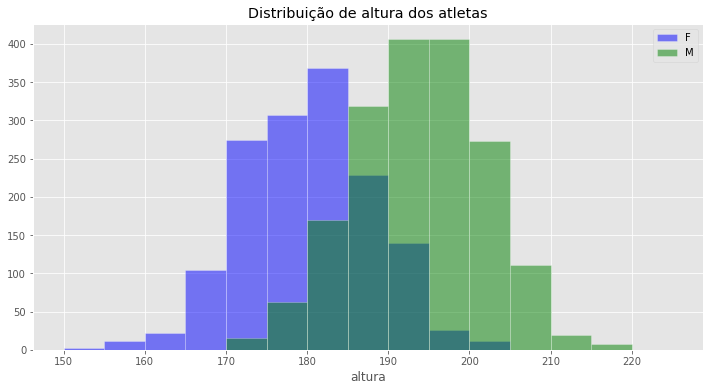

In [110]:
plt.figure(figsize=(12,6))
plt.title("Distribuição de altura dos atletas")
plt.xlabel("altura")
plt.hist(df[df.sexo == 'F'].altura, bins=np.arange(150,230,5), color="blue", label='F', edgecolor="white",alpha=0.5)
plt.hist(df[df.sexo == 'M'].altura, bins=np.arange(150,230,5), color="green",label='M', edgecolor="white",alpha=0.5)
plt.legend()

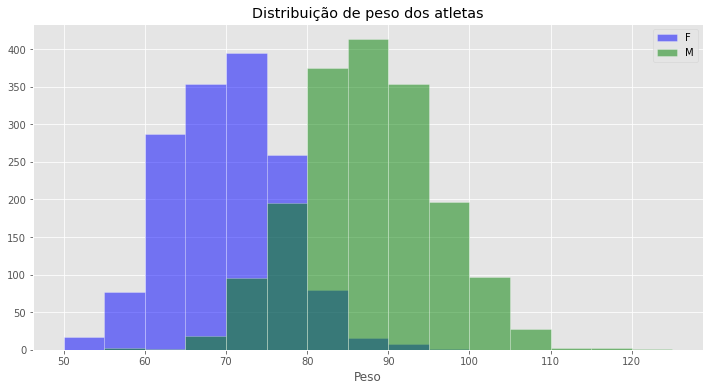

In [9]:
plt.figure(figsize=(12,6))
plt.title("Distribuição de peso dos atletas")
plt.xlabel("Peso")
plt.hist(df[df.sexo == 'F'].peso, bins=np.arange(50,130,5), color="blue", label='F', edgecolor="white",alpha=0.5)
plt.hist(df[df.sexo == 'M'].peso, bins=np.arange(50,130,5), color="green",label='M', edgecolor="white",alpha=0.5)
plt.legend()

In [10]:
# verificando dados faltantes
df.isnull().sum()

ano               0
edicao            0
cidade_sede       0
pais              0
delegacao         0
equipe            0
id_atleta         0
nome_atleta       0
sexo              0
idade             9
altura          121
peso            127
esporte           0
evento            0
medalha        2435
dtype: int64

In [10]:
# número de participações de cada pais
n_paises = (df.filter(items=['pais','ano'])
              .groupby(['pais','ano'])
              .count()
              .reset_index()
           )

In [14]:
n_paises.head()

,pais,ano
0,Algeria,1992
1,Algeria,2008
2,Algeria,2012
3,Argentina,1984
4,Argentina,1988


In [11]:
fem = (df[df.sexo == 'F']
            .filter(items=['pais','ano'])
            .groupby(['pais','ano'])
            .sum()
            .reset_index())

In [12]:
paises_fem = (fem.pais.value_counts()
                      .rename_axis('pais')
                      .reset_index(name='participacoes'))

In [13]:
masc = (df[df.sexo == 'M'].filter(items=['pais','ano'])
                          .groupby(['pais','ano'])
                          .sum()
                          .reset_index())

In [14]:
paises_masc = (masc.pais.value_counts()
                        .rename_axis('pais')
                        .reset_index(name='participacoes'))

In [15]:
paises_masc

,pais,participacoes
0,Brazil,14
1,Russia,13
2,Italy,11
3,USA,11
4,Poland,9
5,Japan,8
6,South Korea,8
7,Bulgaria,8
8,Argentina,7
9,Cuba,7


<Figure size 864x432 with 0 Axes>

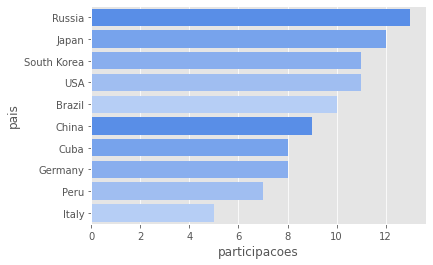

In [130]:
plt.figure(figsize=(12,6))
plt.figure("Quantidade de participações dos paises")
sns.barplot(y='pais',x='participacoes',data=paises_fem.head(10), palette=theme)
plt.show()

<Figure size 864x432 with 0 Axes>

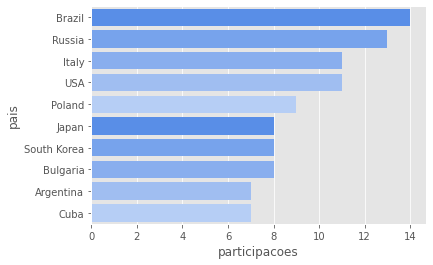

In [131]:
plt.figure(figsize=(12,6))
plt.figure("Quantidade de participações dos paises")
sns.barplot(y='pais', x='participacoes',data = paises_masc.head(10), palette=theme)
plt.show()

In [ ]:
#df_f = df.altura.fillna(df.altura.mean(), inplace=True)

# Analisando o voleibol feminino

In [31]:
paises_fem.head()

,pais,participacoes
0,Russia,13
1,Japan,12
2,South Korea,11
3,USA,11
4,Brazil,10


In [18]:
paises = paises_fem.pais.tolist()[0:10]

In [19]:
cols = ['ano','cidade_sede','nome_atleta','idade','altura','medalha']

In [20]:
df_fem = df[df.sexo == 'F']

In [21]:
df_idades = df_fem[df_fem.pais.isin(paises)]

In [22]:
df_idades.groupby(["pais","ano"]).median()

idade  altura  peso
pais   ano                      
Brazil 1980   19.5   175.5  65.5
       1984   21.5   178.5  64.0
       1988   21.5   178.5  66.0
       1992   22.0   181.0  70.5
       1996   26.0   182.5  71.0
...            ...     ...   ...
USA    2000   24.0   183.0  74.5
       2004   25.0   185.5  78.5
       2008   27.5   185.5  77.0
       2012   26.0   187.0  77.0
       2016   26.5   188.0  75.0

[94 rows x 3 columns]

In [23]:
df_idades = df_idades.groupby(["pais","ano"]).median().reset_index()

In [24]:
df_idades

,pais,ano,idade,altura,peso
0,Brazil,1980,19.5,175.5,65.5
1,Brazil,1984,21.5,178.5,64.0
2,Brazil,1988,21.5,178.5,66.0
3,Brazil,1992,22.0,181.0,70.5
4,Brazil,1996,26.0,182.5,71.0
...,...,...,...,...,...
89,USA,2000,24.0,183.0,74.5
90,USA,2004,25.0,185.5,78.5
91,USA,2008,27.5,185.5,77.0
92,USA,2012,26.0,187.0,77.0


In [132]:
plt.figure(figsize=(14,8))
fig = px.line(df_idades, x = 'ano', y = 'idade', color = 'pais', symbol = 'pais')
fig.show()
fig.write_html("media_idade_por_pais.html")

<Figure size 1008x576 with 0 Axes>

In [26]:
plt.figure(figsize=(14,8))
fig = px.line(df_idades, x = 'ano', y = 'altura', color = 'pais', symbol = 'pais')
fig.show()
fig.write_html("media_altura_por_pais.html")

<Figure size 1008x576 with 0 Axes>

## Analisando o vôlei feminino brasileiro

In [118]:
df.head()

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
0,1964,Summer,Tokyo,Brazil,BRA,Brazil,13470,Victor Mrio Barcellos Borges,M,22.0,177.0,73.0,Volleyball,Volleyball Men's Volleyball,None
1,1964,Summer,Tokyo,Brazil,BRA,Brazil,24641,Jos Maria Schwartz da Costa,M,23.0,185.0,76.0,Volleyball,Volleyball Men's Volleyball,None
2,1964,Summer,Tokyo,Brazil,BRA,Brazil,25896,Dcio Viotti de Azevedo,M,24.0,184.0,74.0,Volleyball,Volleyball Men's Volleyball,None
3,1964,Summer,Tokyo,Brazil,BRA,Brazil,26507,Hamilton Leo de Oliveira,M,30.0,182.0,70.0,Volleyball,Volleyball Men's Volleyball,None
4,1964,Summer,Tokyo,Brazil,BRA,Brazil,34485,Carlos Eduardo Albano Feitosa,M,23.0,180.0,75.0,Volleyball,Volleyball Men's Volleyball,None


In [27]:
df_bra = df[df.pais == 'Brazil'][df.sexo == 'F']

In [28]:
df_bra.isnull().sum()

ano             0
edicao          0
cidade_sede     0
pais            0
delegacao       0
equipe          0
id_atleta       0
nome_atleta     0
sexo            0
idade           0
altura          2
peso            2
esporte         0
evento          0
medalha        72
dtype: int64

In [131]:
df_bra[df_bra['altura'].isnull()]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
1498,1992,Summer,Barcelona,Brazil,BRA,Brazil,21582,Cilene Falleiro Rocha (-Drewnick),F,25.0,NaN,NaN,Volleyball,Volleyball Women's Volleyball,None
1516,1992,Summer,Barcelona,Brazil,BRA,Brazil,120430,"Cristina ""Tina"" Pacheco Lopes",F,26.0,NaN,NaN,Volleyball,Volleyball Women's Volleyball,None


In [143]:
df_bra[df_bra['peso'].isnull()]

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
1498,1992,Summer,Barcelona,Brazil,BRA,Brazil,21582,Cilene Falleiro Rocha (-Drewnick),F,25.0,180.7,NaN,Volleyball,Volleyball Women's Volleyball,None
1516,1992,Summer,Barcelona,Brazil,BRA,Brazil,120430,"Cristina ""Tina"" Pacheco Lopes",F,26.0,180.7,NaN,Volleyball,Volleyball Women's Volleyball,None


In [129]:
df_bra.altura.mean()

181.4406779661017

In [142]:
df_bra.isnull().sum()

ano             0
edicao          0
cidade_sede     0
pais            0
delegacao       0
equipe          0
id_atleta       0
nome_atleta     0
sexo            0
idade           0
altura          0
peso            2
esporte         0
evento          0
medalha        72
dtype: int64

In [134]:
df_bra[df.ano == 1992].altura.mean()

180.7

In [29]:
df_bra.altura.fillna(df_bra[df.ano == 1992].altura.mean(), inplace=True)

In [30]:
df_bra.peso.fillna(df_bra[df.ano == 1992].peso.mean(), inplace=True)

In [148]:
df_bra

,ano,edicao,cidade_sede,pais,delegacao,equipe,id_atleta,nome_atleta,sexo,idade,altura,peso,esporte,evento,medalha
832,1980,Summer,Moskva,Brazil,BRA,Brazil,2465,Eliana Maria Nagib Aleixo,F,26.0,172.0,63.0,Volleyball,Volleyball Women's Volleyball,None
837,1980,Summer,Moskva,Brazil,BRA,Brazil,18881,"Maria Auxiliadora Villar ""Dora"" Castanheira",F,20.0,172.0,68.0,Volleyball,Volleyball Women's Volleyball,None
838,1980,Summer,Moskva,Brazil,BRA,Brazil,25430,Ivonete das Neves,F,19.0,175.0,68.0,Volleyball,Volleyball Women's Volleyball,None
840,1980,Summer,Moskva,Brazil,BRA,Brazil,52406,Maria Isabel Barroso Alencar Salgado,F,19.0,180.0,67.0,Volleyball,Volleyball Women's Volleyball,None
841,1980,Summer,Moskva,Brazil,BRA,Brazil,68626,Vera Helena Mossa Leme,F,15.0,183.0,62.0,Volleyball,Volleyball Women's Volleyball,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,2016,Summer,Rio de Janeiro,Brazil,BRA,Brazil,70353,"Danielle ""Dani"" Rodrigues Lins",F,31.0,183.0,71.0,Volleyball,Volleyball Women's Volleyball,None
3161,2016,Summer,Rio de Janeiro,Brazil,BRA,Brazil,84677,Natlia Zlio Pereira,F,27.0,184.0,76.0,Volleyball,Volleyball Women's Volleyball,None
3163,2016,Summer,Rio de Janeiro,Brazil,BRA,Brazil,109482,Sheilla Tavares de Castro Blassioli,F,33.0,185.0,65.0,Volleyball,Volleyball Women's Volleyball,None
3164,2016,Summer,Rio de Janeiro,Brazil,BRA,Brazil,110533,Lia Henrique da Silva Nicolosi,F,31.0,169.0,30.0,Volleyball,Volleyball Women's Volleyball,None


(array([ 0.,  0.,  1.,  2., 13., 16., 15., 20., 18., 12.,  9., 10.,  3.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58]),
 <BarContainer object of 24 artists>)

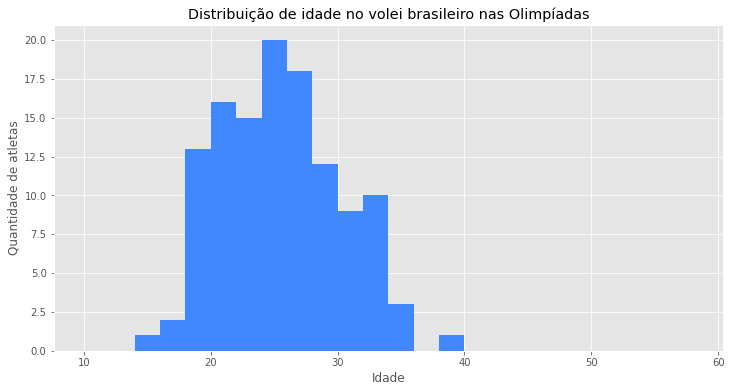

In [134]:
# idade
plt.figure(figsize=(12,6))
plt.title("Distribuição de idade no volei brasileiro nas Olimpíadas")
plt.xlabel("Idade")
plt.ylabel("Quantidade de atletas")
plt.hist(df_bra.idade, bins = np.arange(10,60,2))

In [33]:
df_bra.idade.median()

25.0

In [154]:
cols = ['ano','cidade_sede','nome_atleta','idade','altura','medalha']

In [161]:
df_bra.filter(items=cols).idade.min()

15.0

In [34]:
df[(df.sexo == 'F') & (df.pais == 'Italy')].filter(items=cols)[df.idade < 20]

,ano,cidade_sede,nome_atleta,idade,altura,medalha
2946,2012,London,Caterina Chiara Bosetti,18.0,179.0,None
3257,2016,Rio de Janeiro,Paola Ogechi Egonu,17.0,190.0,None
3264,2016,Rio de Janeiro,Alessia Orro,18.0,180.0,None


In [93]:
# atletas que foram para uma olimpiada com menos de 20 anos
df_bra.filter(items=cols)[df_bra.idade < 20]

,ano,cidade_sede,nome_atleta,idade,altura,medalha
838,1980,Moskva,Ivonete das Neves,19.0,175.0,None
840,1980,Moskva,Maria Isabel Barroso Alencar Salgado,19.0,180.0,None
841,1980,Moskva,Vera Helena Mossa Leme,15.0,183.0,None
843,1980,Moskva,Ana Paula Rodrgues Mello,18.0,176.0,None
846,1980,Moskva,Lenice Peluso Oliveira,19.0,179.0,None
849,1980,Moskva,"Jacqueline Louise ""Jackie"" da Cruz Silva",18.0,170.0,None
1050,1984,Los Angeles,Eliana Miranda da Costa,19.0,177.0,None
1054,1984,Los Angeles,Ana Ida Margarita Alvarez Vieira,19.0,177.0,None
1056,1984,Los Angeles,Vera Helena Mossa Leme,19.0,183.0,None
1057,1984,Los Angeles,Luiza Pinheiro Machado,19.0,175.0,None


*Nenhuma atleta brasileira foi medalhista olimpica com menos de 20 anos até a edição de 2021, onde a Ana Cristina  com 17 anos foi medalhista olimpica de prata. Erika Coimbra foi medalhista olimpica de Bronze* 

In [36]:
df_bra.filter(items=cols)[df_bra.medalha == 'Bronze']

,ano,cidade_sede,nome_atleta,idade,altura,medalha
1726,1996,Atlanta,Ana Flvia Chritaro Daniel Sanglard,26.0,187.0,Bronze
1727,1996,Atlanta,Ana Paula Rodrigues Connelly (-Rodrigues Henkel),24.0,183.0,Bronze
1728,1996,Atlanta,Fernanda Porto Venturini,25.0,180.0,Bronze
1729,1996,Atlanta,"Ericlia ""Fil"" Bodziak",26.0,192.0,Bronze
1730,1996,Atlanta,"Hlia ""Fofo"" Rogrio de Souza Pinto",26.0,173.0,Bronze
1733,1996,Atlanta,Hilma Aparecida Caldeira,24.0,182.0,Bronze
1734,1996,Atlanta,Ana Ida Margarita Alvarez Vieira,31.0,177.0,Bronze
1735,1996,Atlanta,Leila de Gomes de Barros,24.0,179.0,Bronze
1736,1996,Atlanta,"Mrcia Regina ""Mrcia Fu"" Cunha",26.0,185.0,Bronze
1738,1996,Atlanta,Ana Beatriz Moser,27.0,185.0,Bronze


In [37]:
df_idade = df_bra.groupby("ano").median().reset_index()

In [38]:
df_idade

,ano,idade,altura,peso
0,1980,19.5,175.5,65.50
1,1984,21.5,178.5,64.00
2,1988,21.5,178.5,66.00
3,1992,22.0,180.7,69.85
4,1996,26.0,182.5,71.00
5,2000,27.0,185.0,72.00
6,2004,26.5,180.0,71.00
7,2008,25.5,184.5,72.00
8,2012,27.0,184.0,72.50
9,2016,31.0,184.0,71.00


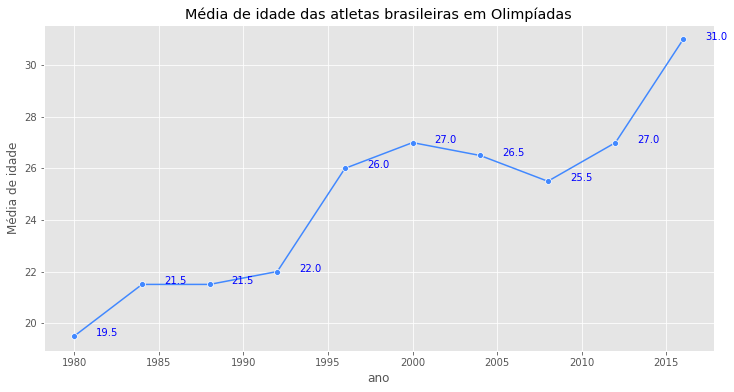

In [135]:
plt.figure(figsize=(12,6))
plt.title("Média de idade das atletas brasileiras em Olimpíadas")
plt.ylabel("Média de idade")
sns.lineplot(data = df_idade, x = 'ano', y = 'idade', marker='o', palette=theme,dashes=False)
for line in range(0,df_idade.shape[0]): # text - (eixo x, eixo y, label msg, alinhamento ....)
     plt.text(df_idade.ano[line]+1.3, df_idade.idade[line], df_idade.idade[line], horizontalalignment='left', size='medium', color='blue')

plt.show()